## Project
1. Develop an app that can :

- Detect any shape in an image
- Count the total number of objects
- Sort the objects by size
- Sort the objects by shape
- Sort the objects by size then shape
- Sort the objects by shape then size
- Create another image of collection of similar shapes at original position 
- seed=1

3. Develop an app that can recognize faces in an image in a video.
- Video file or live recording
- seed=3

- Note: Apps in jupyter first, then convert to .py

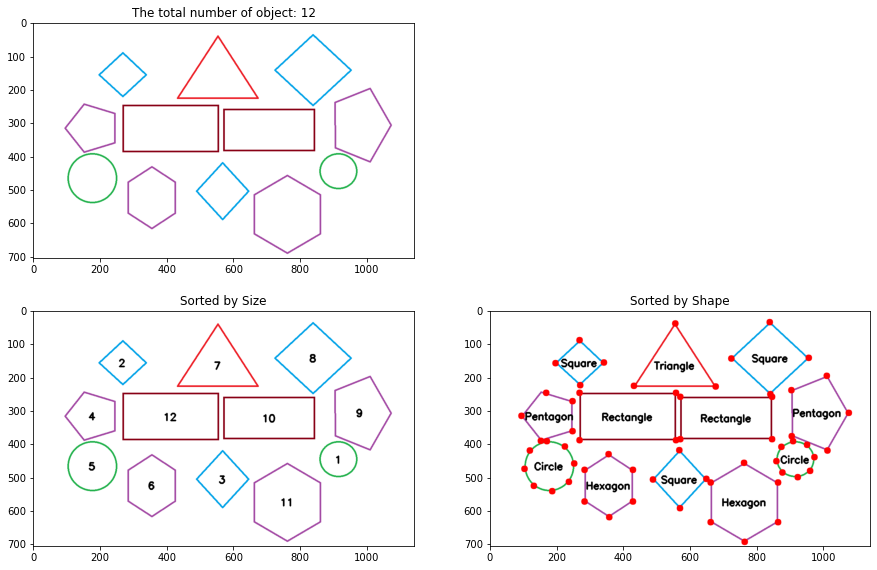

In [1]:
#Question 1

import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../essential/mypaintshape.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 150, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
#print(f"The total number of object: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)
#print(imgGray[250,50])
plt.figure(figsize=(15,15))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(321)
plt.title(f"The total number of object: {len(contours)}")
plt.imshow(imgRGB)

imgSize = img.copy()
for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgSize, text, (text_x, text_y), fontFace, fontScale, color, thickness)
    
# approxPolyDP():
imgApproxPolyDP = img.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    color = (0, 255, 255)
    thickness = 5
    
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (0, 0, 255)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        #print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)
            

    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        #print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    else:
        vertice_shape = (verticeNumber, 'Circle')
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])
    # Get the position to draw:
    
    text = vertice_shape[1]
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)
      
# BGR to RGB
imgRGB = imgSize[:,:,::-1]
plt.subplot(323)
plt.title("Sorted by Size")
plt.imshow(imgRGB)

imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(324)
plt.title("Sorted by Shape")
plt.imshow(imgRGB)

plt.show()

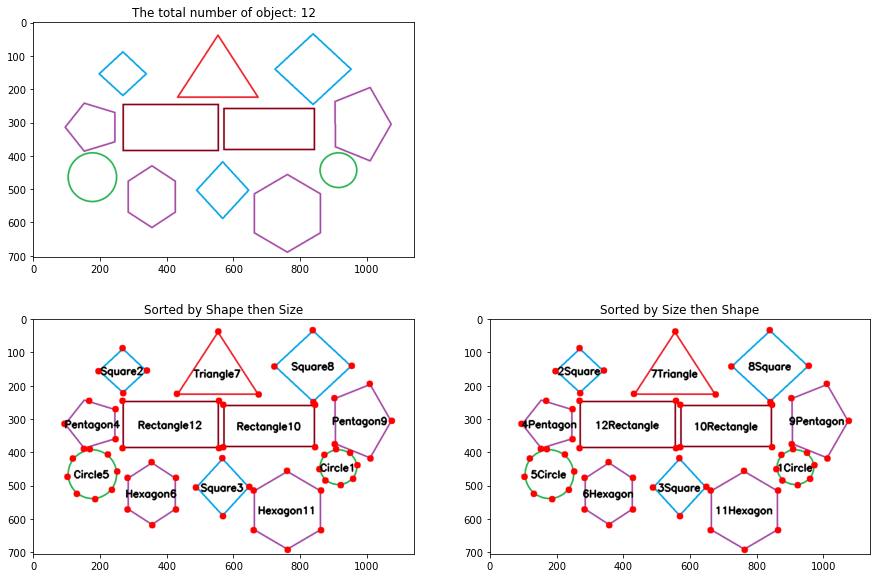

In [2]:
#Question 1 part 2

import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../essential/mypaintshape.png")

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 150, 255, cv.THRESH_BINARY_INV)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
#print(f"The total number of object: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)
#print(imgGray[250,50])
plt.figure(figsize=(15,10))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title(f"The total number of object: {len(contours)}")
plt.imshow(imgRGB)

imgSize = img.copy()
imgShape = img.copy()
for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgSize, [approx], 0, color, thickness)
        cv.drawContours(imgShape, [approx], 0, color, thickness)
    color = (0, 0, 255)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        #print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgSize, pp, 10, color, -1)
            cv.circle(imgShape, pp, 10, color, -1)
 
    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        #print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    else:
        vertice_shape = (verticeNumber, 'Circle')
    
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text1 = vertice_shape[1]
    text2 = str(i + 1)
    text = text1 + text2
    text3 = text2 + text1
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgSize, text, (text_x, text_y), fontFace, fontScale, color, thickness)
    cv.putText(imgShape, text3, (text_x, text_y), fontFace, fontScale, color, thickness)
    

# BGR to RGB
imgRGB = imgSize[:,:,::-1]
plt.subplot(223)
plt.title("Sorted by Shape then Size")

plt.imshow(imgRGB)

imgRGB = imgShape[:,:,::-1]
plt.subplot(224)
plt.title("Sorted by Size then Shape")
plt.imshow(imgRGB)

plt.show()

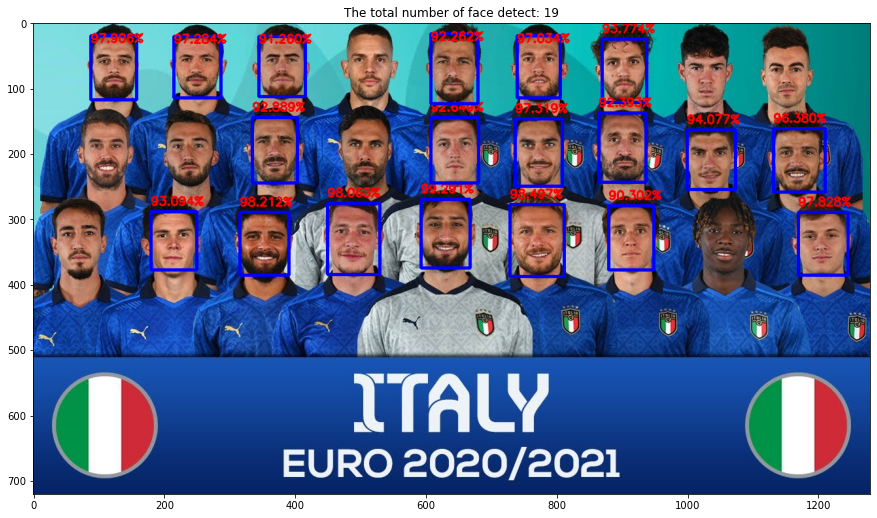

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread("../essential/assets/faceAssignment.jpg")

# image dimension
h, w = img.shape[:2]

# load model
model = cv.dnn.readNetFromTensorflow("../samples/data/opencv_face_detector_uint8.pb", "../samples/data/opencv_face_detector.pbtxt")

# preprocessing
# image resize to 300x300 by substraction mean vlaues [104., 117., 123.]
blob = cv.dnn.blobFromImage(img, 1.0, (300, 300), [
                            104., 117., 123.], False, False)

# set blob asinput and detect face
model.setInput(blob)
detections = model.forward()

faceCounter = 0
# draw detections above limit confidence > 0.7
for i in range(0, detections.shape[2]):
    # confidence
    confidence = detections[0, 0, i, 2]
    #
    if confidence > 0.9:
        #0.4 for all detect 24
        # face counter
        faceCounter += 1
        # get coordinates of the current detection
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (x1, y1, x2, y2) = box.astype("int")

        # Draw the detection and the confidence:
        cv.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
        text = "{:.3f}%".format(confidence * 100)
        y = y1 - 10 if y1 - 10 > 10 else y1 + 10
        cv.putText(img, text, (x1, y), cv.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# show
fig = plt.figure(figsize=(15, 15))

# Plot the images:
imgRGB = img[:,:,::-1]
plt.title(f'The total number of face detect: {faceCounter}')
plt.imshow(imgRGB)

plt.show()

In [4]:
import cv2 as cv
import numpy as np
import face_recognition


capture = cv.VideoCapture(0)

# check if connected
#filePath = "../essential/forProject1.avi"
#capture = cv.VideoCapture(filePath)

if capture.isOpened() is False:
    print("Error opening camera 0")
    exit()

while capture.isOpened():
    # capture frames, if read correctly ret is True
    ret, frame = capture.read()
    
    if not ret:
        print("Didn't receive frame. Stop ")
        break
        
    facedetect = frame.copy()  
    img5 = frame.copy()
    # BRG to RGB
    rgb = frame[:, :, ::-1]
    
    # image dimension
    h, w =  facedetect.shape[:2]

    # load model
    model = cv.dnn.readNetFromTensorflow("../samples/data/opencv_face_detector_uint8.pb", "../samples/data/opencv_face_detector.pbtxt")

    # preprocessing
    # image resize to 300x300 by substraction mean vlaues [104., 117., 123.]
    blob = cv.dnn.blobFromImage( facedetect, 1.0, (300, 300), [
                                104., 117., 123.], False, False)

    # set blob asinput and detect face
    model.setInput(blob)
    detections = model.forward()

    faceCounter = 0
    # draw detections above limit confidence > 0.7
    for i in range(0, detections.shape[2]):
        # confidence
        confidence = detections[0, 0, i, 2]
        #
        if confidence > 0.7:
            # face counter
            faceCounter += 1
            # get coordinates of the current detection
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (x1, y1, x2, y2) = box.astype("int")

            # Draw the detection and the confidence:
            cv.rectangle( facedetect, (x1, y1), (x2, y2), (0, 255, 0), 3)
            text = "{:.3f}%".format(confidence * 100)
            y = y1 - 10 if y1 - 10 > 10 else y1 + 10
            cv.putText( facedetect, text, (x1, y), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Detect 5 landmarks:
    face_landmarks_list_5 = face_recognition.face_landmarks(rgb, None, "small")

    #print(face_landmarks_list_5)
    # Draw all detected landmarks:
    for face_landmarks in face_landmarks_list_5:
        for facial_feature in face_landmarks.keys():
            for p in face_landmarks[facial_feature]:
                cv.circle(facedetect, p, 2, (0, 0, 255), -1)

    # display frame
    cv.imshow("Face detection",  facedetect)
    #cv.imshow("5 Landmarks",  img5) 
   
    k = cv.waitKey(1) 
    # check if key is q then exit
    if k == ord("q"):
        break

capture.release()
cv.destroyAllWindows()